In [1]:
import methods
import dgp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import importlib
import tqdm
import os
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/src/')
import credence
import autoencoder
importlib.reload(autoencoder)
importlib.reload(credence)
importlib.reload(methods)
importlib.reload(dgp)
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/notebooks/')
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid",font_scale=1.5)

In [2]:
np.random.seed(0)

df_1, df_true_1 = dgp.dgp1(p=2)

df_2, df_true_2 = dgp.dgp2()

df_exp_lalonde, df_obs_lalonde = dgp.lalonde()

df_exp_star, df_obs_star = dgp.project_star()

In [3]:
ate_1 = methods.bootstrap_ate_inference(outcome='Y',treatment='T',data=df_1,repeats=10)
bias_1 = ate_1 - df_true_1['TE'].mean()

ate_2 = methods.bootstrap_ate_inference(outcome='Y',treatment='T',data=df_2,repeats=10)
bias_2 = ate_2 - df_true_2['TE'].mean()

ate_exp_lalonde = df_exp_lalonde.loc[df_exp_lalonde['treat']==1,'re78'].mean() - df_exp_lalonde.loc[df_exp_lalonde['treat']==0,'re78'].mean()
ate_lalonde = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_obs_lalonde,repeats=10)
bias_lalonde = ate_lalonde - ate_exp_lalonde

ate_exp_star = df_exp_star.loc[df_exp_star['g3smallclass']==1,'g3avgscore'].mean() - df_exp_star.loc[df_exp_star['g3smallclass']==0,'g3avgscore'].mean()
ate_star = methods.bootstrap_ate_inference(outcome='g3avgscore',treatment='g3smallclass',data=df_obs_star,repeats=10)
bias_star = ate_star - ate_exp_star

In [4]:
ate_1.to_csv('ate_1.csv')
bias_1.to_csv('bias_1.csv')
ate_2.to_csv('ate_2.csv')
bias_2.to_csv('bias_2.csv')
ate_lalonde.to_csv('ate_lalonde.csv')
bias_lalonde.to_csv('bias_lalonde.csv')
ate_star.to_csv('ate_star.csv')
bias_star.to_csv('bias_star.csv')

In [180]:
bias_1 = pd.read_csv('bias_1.csv',index_col=0)
bias_2 = pd.read_csv('bias_2.csv',index_col=0)
bias_lalonde = pd.read_csv('bias_lalonde.csv',index_col=0)
bias_star = pd.read_csv('bias_star.csv',index_col=0)

bias_1 = bias_1.stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_1['data']='Quadratic DGP'
bias_1['iter']=0
bias_2 = bias_2.stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_2['data']='Friedman\'s DGP'
bias_2['iter']=0

order = ['Linear DML', 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE']

bias_lalonde = bias_lalonde[order].stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_lalonde['data']='Lalonde'
bias_lalonde['iter']=0
bias_star = bias_star[order].stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_star['data']='Project STAR'
bias_star['iter']=0

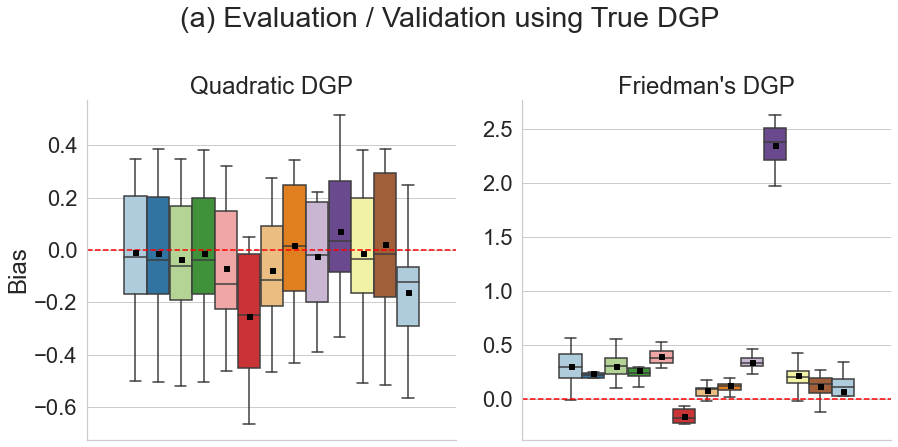

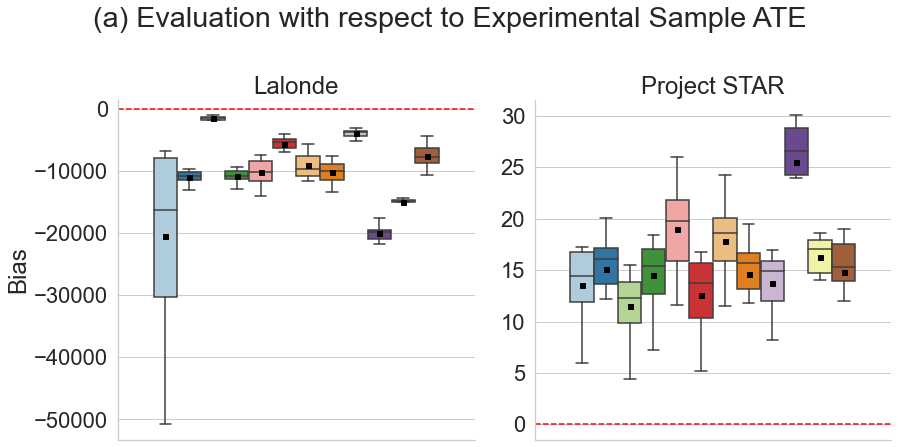

In [225]:
order = [ 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE','Linear DML', 'Gradient Boosting Trees DML']
sns.set(style="whitegrid",font_scale=2)
g = sns.catplot(data=bias_1.append(bias_2,ignore_index=True), col='data', hue='Method', 
                x='iter', y='Bias', kind='box', hue_order=order, sharey=False,height=6.5,palette=sns.color_palette("Paired"),
                showmeans=True,
                meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
                showfliers=False, legend=False)
g.set_xlabels('')
g.set_xticklabels([],[])
g.fig.suptitle('(a) Evaluation / Validation using True DGP')
g.tight_layout()
g.refline(y=0,color='red')
g.set_titles(col_template="{col_name}")
# g.add_legend(ncol=3,loc='lower left',bbox_to_anchor=(0,1))
g.savefig('dgp1_dgp2_true.png')

order = ['Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE', 'Linear DML']

sns.set(style="whitegrid",font_scale=2)
g = sns.catplot(data=bias_lalonde.append(bias_star,ignore_index=True), col='data', hue='Method', 
                x='iter', y='Bias', kind='box', hue_order=order, sharey=False,height=6.5,palette=sns.color_palette("Paired"),
                showmeans=True,
                meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
                showfliers=False,legend=False)
g.set_xlabels('')
g.set_xticklabels([],[])
g.fig.suptitle('(a) Evaluation with respect to Experimental Sample ATE')
g.tight_layout()
g.refline(y=0,color='red')
g.set_titles(col_template="{col_name}")
# g.add_legend(ncol=3,loc='lower left',bbox_to_anchor=(0,1))
g.savefig('lalonde_star_wrt_exp.png')

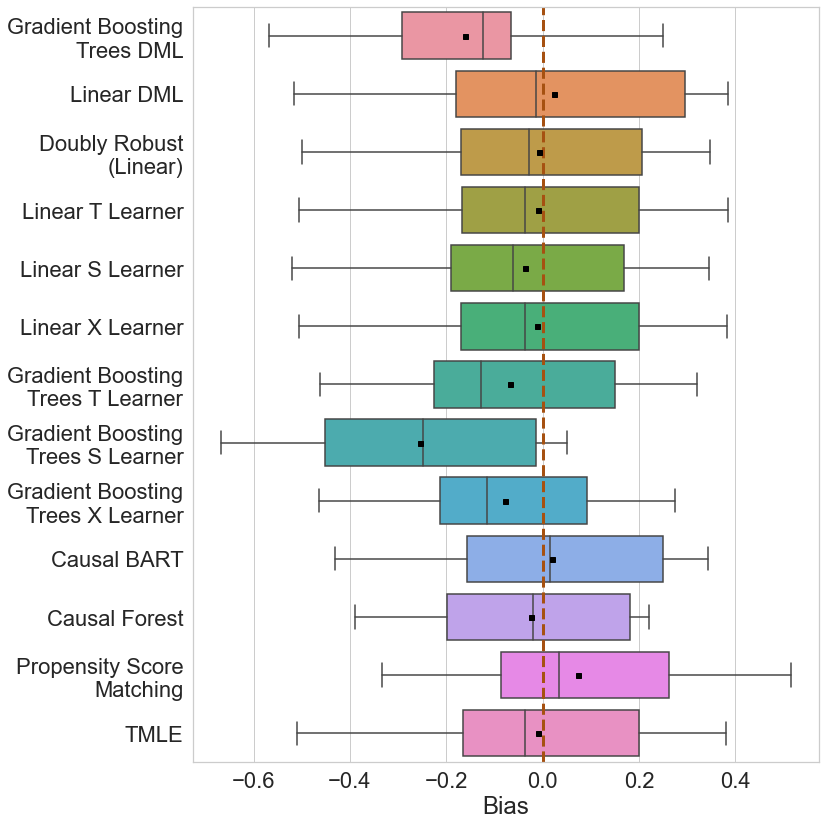

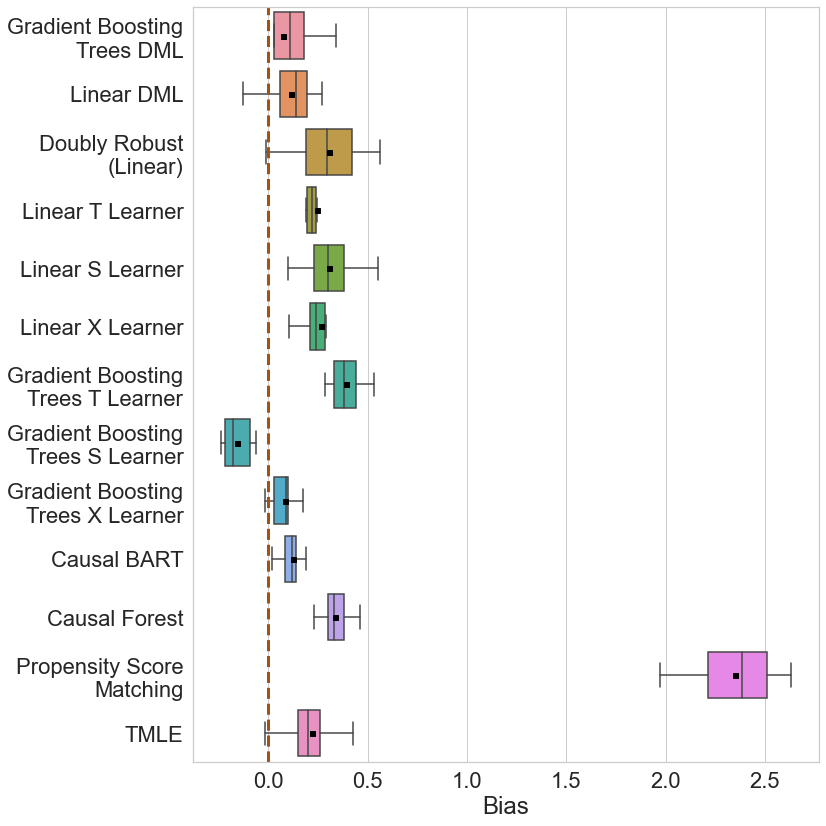

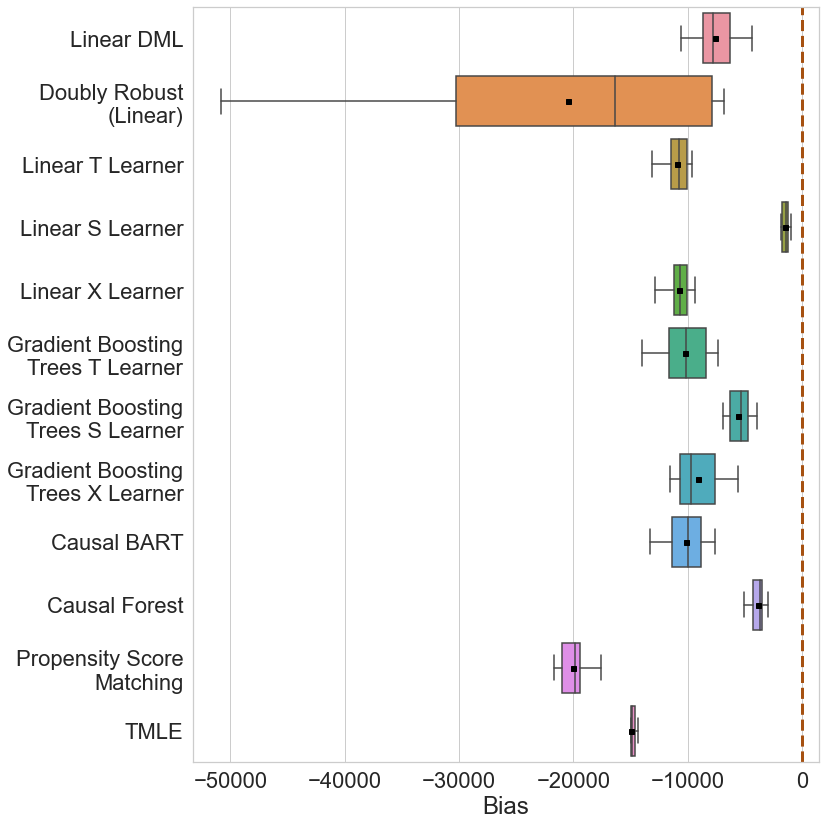

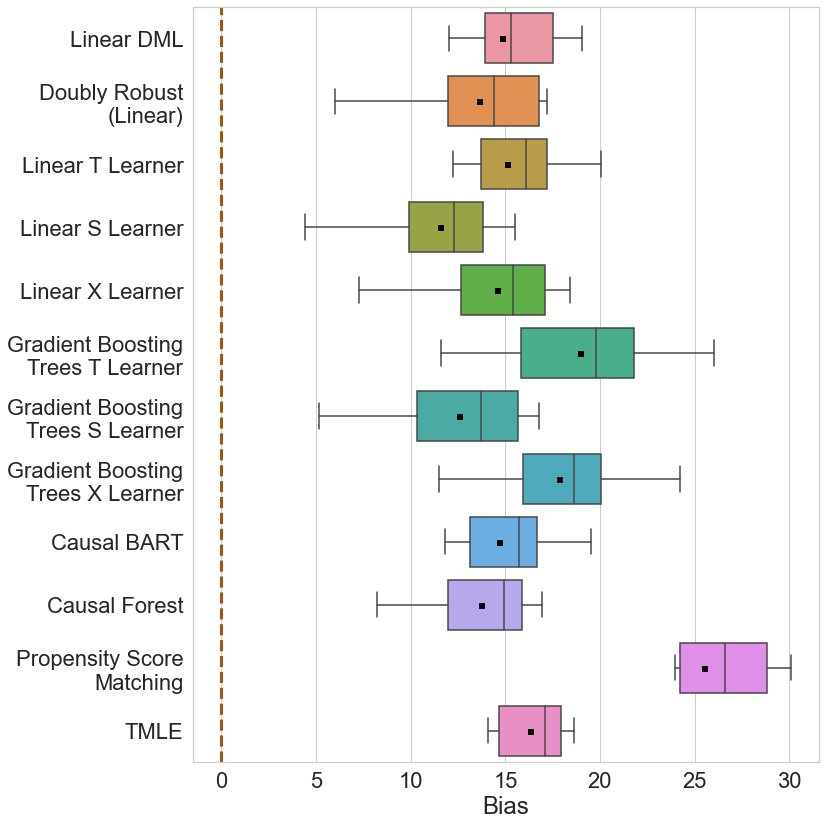

In [4]:
order = ['Gradient Boosting Trees DML', 'Linear DML', 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE']

bias_1 = pd.read_csv('bias_1.csv',index_col=0)
bias_2 = pd.read_csv('bias_2.csv',index_col=0)
bias_lalonde = pd.read_csv('bias_lalonde.csv',index_col=0)
bias_star = pd.read_csv('bias_star.csv',index_col=0)

width, height = 12, 12
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_1[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.tight_layout()
fig.savefig('Figures/dgp1_bias_true.png')


# order = list(np.abs(bias_2.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_2[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.tight_layout()
plt.savefig('Figures/dgp2_bias_true.png')


order = ['Linear DML', 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE']
# order = list(np.abs(bias_lalonde.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_lalonde[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
# plt.xlim((-40000,10000))
plt.tight_layout()
plt.savefig('Figures/lalonde_bias_wrt_exp.png')

# order = list(np.abs(bias_star.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_star[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
# plt.xlim((-10,40))
plt.tight_layout()
plt.savefig('Figures/star_bias_wrt_exp.png')

pd.concat([bias_1.mean(axis=0),bias_1.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp1_bias_true.tex')
pd.concat([bias_2.mean(axis=0),bias_2.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp2_bias_true.tex')
pd.concat([bias_lalonde.mean(axis=0),bias_lalonde.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/lalonde_bias_wrt_exp.tex')
pd.concat([bias_star.mean(axis=0),bias_star.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/star_bias_wrt_exp.tex')

# pd.concat([ate_1.mean(axis=0),ate_1.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp1_ate_true.tex')
# pd.concat([ate_2.mean(axis=0),ate_2.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp2_ate_true.tex')
# pd.concat([ate_lalonde.mean(axis=0),ate_lalonde.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/lalonde_ate_wrt_exp.tex')
# pd.concat([ate_star.mean(axis=0),ate_star.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/star_ate_wrt_exp.tex')

# Validation Using Credence

In [185]:
# v_1 = credence.Credence(data=df_1, # dataframe 
#                       post_treatment_var=['Y'], # list of post treatment variables
#                       treatment_var=['T'], # list of treatment variable(s)
#                       categorical_var=['T'], # list of variables which are categorical
#                       numerical_var=list(df_1.drop(columns=['T']).columns) # list of variables which are numerical
#                      )
# gen_1 = v_1.fit(latent_dim=10,
#                 hidden_dim=[18],
#                 batch_size=50,
#                 effect_rigidity=0,
#                 bias_rigidity=5e+5,
#                 kld_rigidity=1e-5,
#                 max_epochs=500)
# # v_1.trainer_treat.save_checkpoint("dgp1_treat_0.ckpt")
# v_1.trainer_pre.save_checkpoint("dgp1_pre_0.ckpt")
# v_1.trainer_post.save_checkpoint("dgp1_post_0.ckpt")


# v_2 = credence.Credence(data=df_2, # dataframe 
#                       post_treatment_var=['Y'], # list of post treatment variables
#                       treatment_var=['T'], # list of treatment variable(s)
#                       categorical_var=['T'], # list of variables which are categorical
#                       numerical_var=list(df_2.drop(columns=['T']).columns) # list of variables which are numerical
#                      )
# gen_2 = v_2.fit(latent_dim=10,
#                 hidden_dim=[18],
#                 batch_size=50,
#                 effect_rigidity=0,
#                 bias_rigidity=5e+5,
#                 kld_rigidity=1e-5,
#                 max_epochs=500)
# # v_1.trainer_treat.save_checkpoint("dgp1_treat_0.ckpt")
# v_2.trainer_pre.save_checkpoint("dgp2_pre_0.ckpt")
# v_2.trainer_post.save_checkpoint("dgp2_post_0.ckpt")



# v_lalonde = credence.Credence(data=(df_obs_lalonde-df_obs_lalonde.min())/np.maximum(0.001,(df_obs_lalonde.max()-df_obs_lalonde.min())), # dataframe 
#                       post_treatment_var=['re78'], # list of post treatment variables
#                       treatment_var=['treat'], # list of treatment variable(s)
#                       categorical_var=['treat','black','hispanic','married','nodegree'], # list of variables which are categorical
#                       numerical_var=list(df_obs_lalonde.drop(columns=['treat','black','hispanic','married','nodegree']).columns) # list of variables which are numerical
#                      )
# gen_lalonde = v_lalonde.fit(latent_dim=7,
#                 hidden_dim=[18],
#                 batch_size=50,
#                 effect_rigidity=5e+4,
#                 bias_rigidity=5e+4,
#                 kld_rigidity=1e-25,
#                 max_epochs=500)
# # v_1.trainer_treat.save_checkpoint("dgp1_treat_0.ckpt")
# v_lalonde.trainer_pre.save_checkpoint("lalonde_pre_0.ckpt")
# v_lalonde.trainer_post.save_checkpoint("lalonde_post_0.ckpt")



v_star = credence.Credence(data=(df_exp_star-df_exp_star.min())/np.maximum(0.0001,(df_exp_star.max()-df_exp_star.min())), # dataframe 
                      post_treatment_var=['g3avgscore'], # list of post treatment variables
                      treatment_var=['g3smallclass'], # list of treatment variable(s)
                      categorical_var=['g3smallclass','race_BLACK','race_HISPANIC', 'race_NATIVE_AMERICAN', 'race_OTHER', 'race_WHITE'], # list of variables which are categorical
                      numerical_var=list(df_exp_star.drop(columns=['g3smallclass','race_BLACK','race_HISPANIC', 'race_NATIVE_AMERICAN', 'race_OTHER', 'race_WHITE']).columns) # list of variables which are numerical
                     )
gen_star = v_star.fit(latent_dim=7,
                hidden_dim=[7],
                batch_size=50,
                effect_rigidity=5e+4,
                bias_rigidity=5e+4,
                kld_rigidity=1e-25,
                max_epochs=150)
# v_1.trainer_treat.save_checkpoint("dgp1_treat_0.ckpt")
v_star.trainer_pre.save_checkpoint("star_pre_0.ckpt")
v_star.trainer_post.save_checkpoint("star_post_0.ckpt")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 70    
1 | en_mu     | Linear     | 56    
2 | en_logvar | Linear     | 56    
3 | decoder   | Sequential | 63    
4 | decode_Y  | Linear     | 72    
-----------------------------------------
317       Trainable params
0         Non-trainable params
317       Total params
0.001     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name      | Type       | Params
-----------------------------------------
0 | encoder   | Sequential | 14    
1 | en_mu     | Linear     | 56    
2 | en_logvar | Linear     | 56    
3 | decoder   | Sequential | 126   
4 | decode_Y  | Linear     | 16    
-----------------------------------------
268       Trainable params
0         Non-trainable params
268       Total params
0.001     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [186]:
# np.random.seed(0)
repeat = 10
# ate_1_gen = pd.DataFrame()
# bias_1_gen = pd.DataFrame()
# for itr in tqdm.tqdm(range(repeat)):
#     df_1_gen_true,df_1_gen_prime = v_1.sample(data=df_1)
#     df_1_gen_true['Y'] = (df_1_gen_true['T'])*df_1_gen_true['Y1'] + (1-df_1_gen_true['T'])*df_1_gen_true['Y0']
#     df_1_gen = df_1_gen_true.drop(columns=['Y0','Y1'])
#     ate_1_gen_itr = methods.bootstrap_ate_inference(outcome='Y',treatment='T',data=df_1_gen,repeats=1)
#     bias_1_gen_itr = ate_1_gen_itr - (
#         (df_1_gen_true['Y1']-df_1_gen_true['Y0']) + 
#         (((1-df_1_gen_true['T'])*df_1_gen_prime['Y1'])-((1-df_1_gen_true['T'])*df_1_gen_true['Y1'])) +
#         (((df_1_gen_true['T'])*df_1_gen_true['Y0'])-((df_1_gen_true['T'])*df_1_gen_prime['Y0']))).mean()
#     ate_1_gen = ate_1_gen.append( ate_1_gen_itr, ignore_index=True)
#     bias_1_gen = bias_1_gen.append( bias_1_gen_itr, ignore_index=True)

# ate_1_gen.to_csv('ate_dgp1_credence.csv')
# bias_1_gen.to_csv('bias_dgp1_credence.csv')

# np.random.seed(0)
# ate_2_gen = pd.DataFrame()
# bias_2_gen = pd.DataFrame()
# for itr in tqdm.tqdm(range(repeat)):
#     df_2_gen_true,df_2_gen_prime = v_2.sample(data=df_2)
#     df_2_gen_true['Y'] = (df_2_gen_true['T'])*df_2_gen_true['Y1'] + (1-df_2_gen_true['T'])*df_2_gen_true['Y0']
#     df_2_gen = df_2_gen_true.drop(columns=['Y0','Y1'])
#     ate_2_gen_itr = methods.bootstrap_ate_inference(outcome='Y',treatment='T',data=df_2_gen,repeats=1)
#     bias_2_gen_itr = ate_2_gen_itr - (
#         (df_2_gen_true['Y1']-df_2_gen_true['Y0']) + 
#         (((1-df_2_gen_true['T'])*df_2_gen_prime['Y1'])-((1-df_2_gen_true['T'])*df_2_gen_true['Y1'])) +
#         (((df_2_gen_true['T'])*df_2_gen_true['Y0'])-((df_2_gen_true['T'])*df_2_gen_prime['Y0']))).mean()
#     ate_2_gen = ate_2_gen.append( ate_2_gen_itr, ignore_index=True)
#     bias_2_gen = bias_2_gen.append( bias_2_gen_itr, ignore_index=True)


# ate_2_gen.to_csv('ate_dgp2_credence.csv')
# bias_2_gen.to_csv('bias_dgp2_credence.csv')

# np.random.seed(0)
# ate_lalonde_gen = pd.DataFrame()
# bias_lalonde_gen = pd.DataFrame()
# for itr in tqdm.tqdm(range(repeat)):
#     df_lalonde_gen_true,df_lalonde_gen_prime = v_lalonde.sample(data=(df_obs_lalonde-df_obs_lalonde.min())/np.maximum(0.001,(df_obs_lalonde.max()-df_obs_lalonde.min())))
#     df_lalonde_gen_true['re78'] = (df_lalonde_gen_true['treat'])*df_lalonde_gen_true['Y1'] + (1-df_lalonde_gen_true['treat'])*df_lalonde_gen_true['Y0']
#     df_lalonde_gen = df_lalonde_gen_true.drop(columns=['Y0','Y1'])
#     ate_lalonde_gen_itr = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_lalonde_gen,repeats=1)
#     bias_lalonde_gen_itr = ate_lalonde_gen_itr -  (
#         (df_lalonde_gen_true['Y1']-df_lalonde_gen_true['Y0']) + 
#         (((1-df_lalonde_gen_true['treat'])*df_lalonde_gen_prime['Y1'])-((1-df_lalonde_gen_true['treat'])*df_lalonde_gen_true['Y1'])) +
#         (((df_lalonde_gen_true['treat'])*df_lalonde_gen_true['Y0'])-((df_lalonde_gen_true['treat'])*df_lalonde_gen_prime['Y0']))).mean()
#     ate_lalonde_gen = ate_lalonde_gen.append( ate_lalonde_gen_itr, ignore_index=True)
#     bias_lalonde_gen = bias_lalonde_gen.append( bias_lalonde_gen_itr, ignore_index=True)
    
# ate_lalonde_gen.to_csv('ate_lalonde_credence.csv')
# bias_lalonde_gen.to_csv('bias_lalonde_credence.csv')

# np.random.seed(0)
# ate_star_gen = pd.DataFrame()
# bias_star_gen = pd.DataFrame()
# for itr in tqdm.tqdm(range(repeat)):
#     df_star_gen_true,df_star_gen_prime = v_star.sample(data=(df_exp_star-df_exp_star.min())/np.maximum(0.001,(df_exp_star.max()-df_exp_star.min())))
#     # df_star_gen_true['g3smallclass'] = np.random.binomial(1,0.5,size=df_star_gen_true.shape[0])
#     df_star_gen_true['g3avgscore'] = (df_star_gen_true['g3smallclass'])*df_star_gen_true['Y1'] + (1-df_star_gen_true['g3smallclass'])*df_star_gen_true['Y0']
#     df_star_gen = df_star_gen_true.drop(columns=['Y0','Y1'])
#     ate_star_gen_itr = methods.bootstrap_ate_inference(outcome='g3avgscore',treatment='g3smallclass',data=df_star_gen,repeats=1)
#     bias_star_gen_itr = ate_star_gen_itr - (
#         (df_star_gen_true['Y1']-df_star_gen_true['Y0']) + 
#         (((1-df_star_gen_true['g3smallclass'])*df_star_gen_prime['Y1'])-((1-df_star_gen_true['g3smallclass'])*df_star_gen_true['Y1'])) +
#         (((df_star_gen_true['g3smallclass'])*df_star_gen_true['Y0'])-((df_star_gen_true['g3smallclass'])*df_star_gen_prime['Y0']))).mean()
#     ate_star_gen = ate_star_gen.append( ate_star_gen_itr, ignore_index=True)
#     bias_star_gen = bias_star_gen.append( bias_star_gen_itr, ignore_index=True)

# # bias_star_gen = bias_star_gen - 0.015
# ate_star_gen.to_csv('ate_star_credence.csv')
# bias_star_gen.to_csv('bias_star_credence.csv')

100%|██████████| 10/10 [12:42<00:00, 76.28s/it]A


In [177]:
bias_1_gen = pd.read_csv('bias_dgp1_credence.csv',index_col=0)
bias_2_gen = pd.read_csv('bias_dgp2_credence.csv',index_col=0)
bias_lalonde_gen = pd.read_csv('bias_lalonde_credence.csv',index_col=0)
bias_star_gen = pd.read_csv('bias_star_credence.csv',index_col=0)

bias_1_gen = bias_1_gen.rename({c: c.replace('NonParametric','Gradient Boosting Trees') for c in bias_1_gen.columns if 'NonParametric' in c}, axis='columns')
bias_2_gen = bias_2_gen.rename({c: c.replace('NonParametric','Gradient Boosting Trees') for c in bias_2_gen.columns if 'NonParametric' in c}, axis='columns')
bias_lalonde_gen = bias_lalonde_gen.rename({c: c.replace('NonParametric','Gradient Boosting Trees') for c in bias_lalonde_gen.columns if 'NonParametric' in c}, axis='columns')
bias_star_gen = bias_star_gen.rename({c: c.replace('NonParametric','Gradient Boosting Trees') for c in bias_star_gen.columns if 'NonParametric' in c}, axis='columns')

bias_1_gen = bias_1_gen.stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_1_gen['data']='Quadratic DGP\n '+ r' $f(X) = (\beta^T X_i)^2 - \beta^T X_i + \alpha^T X_i$'+'\n'+r'$g(X,T)=0$'
bias_1_gen['iter']=0
bias_2_gen = bias_2_gen.stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_2_gen['data']='Friedman\'s DGP\n '+r' $f(X) = X_{i,3}~\cos(\pi X_{i,1} X_{i,2})$'+'\n'+r'$g(X,T)=0$'
bias_2_gen['iter']=0

order = ['Linear DML', 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE']

bias_lalonde_gen = bias_lalonde_gen[order].stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_lalonde_gen['data']='Lalonde'
bias_lalonde_gen['iter']=0
bias_star_gen = bias_star_gen[order].stack().reset_index().rename(columns={'level_0':'data','level_1':'Method',0:'Bias'})
bias_star_gen['data']='Project STAR'
bias_star_gen['iter']=0

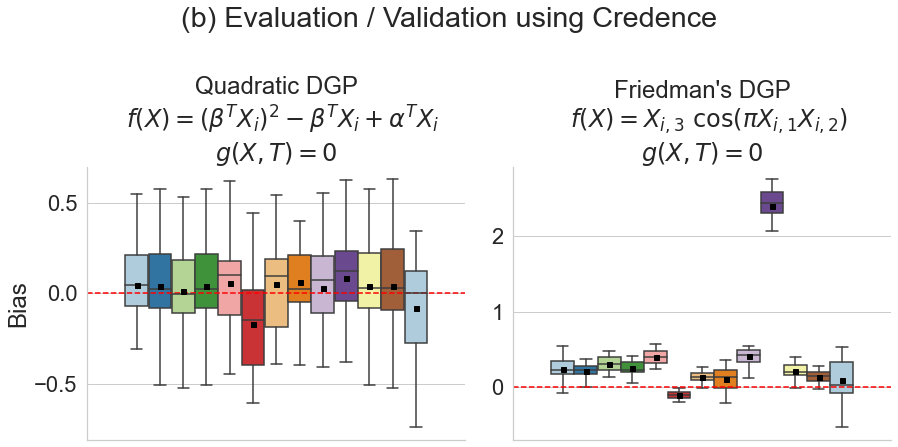

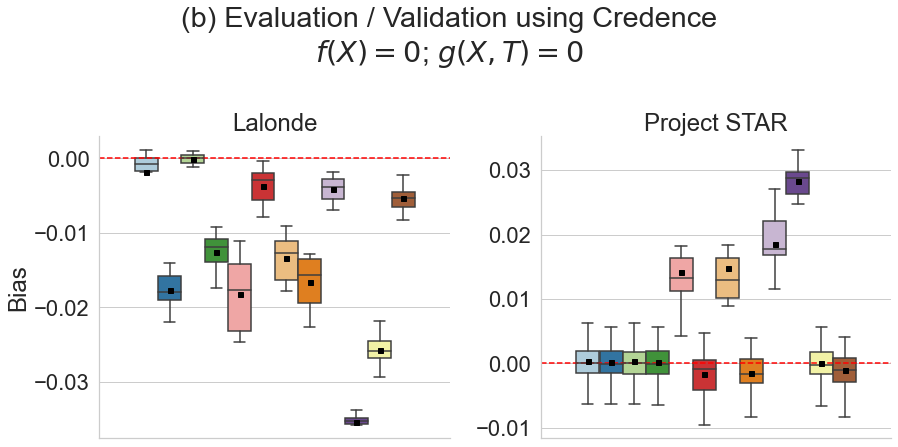

In [184]:
order = [ 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE','Linear DML', 'Gradient Boosting Trees DML']
sns.set(style="whitegrid",font_scale=2)
g = sns.catplot(data=bias_1_gen.append(bias_2_gen,ignore_index=True), col='data', hue='Method', 
                x='iter', y='Bias', kind='box', hue_order=order, sharey=False,height=6.5,palette=sns.color_palette("Paired"),
                showmeans=True,
                meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
                showfliers=False, legend=False)
g.set_xlabels('')
g.set_xticklabels([],[])
g.fig.suptitle(r'(b) Evaluation / Validation using Credence')
g.tight_layout()
g.refline(y=0,color='red')
g.set_titles(col_template="{col_name}")
g.savefig('dgp1_dgp2_credence_0.png')

order = ['Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE', 'Linear DML']

sns.set(style="whitegrid",font_scale=2)
g = sns.catplot(data=bias_lalonde_gen.append(bias_star_gen,ignore_index=True), col='data', hue='Method', 
                x='iter', y='Bias', kind='box', hue_order=order, sharey=False,height=6.5,palette=sns.color_palette("Paired"),
                showmeans=True,
                meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},
                showfliers=False, legend=False)
g.set_xlabels('')
g.set_xticklabels([],[])
g.fig.suptitle('(b) Evaluation / Validation using Credence\n'+r'$f(X) = 0$; $g(X,T)=0$')
g.tight_layout()
g.refline(y=0,color='red')
g.set_titles(col_template="{col_name}")
g.savefig('lalonde_star_credence_0.png')

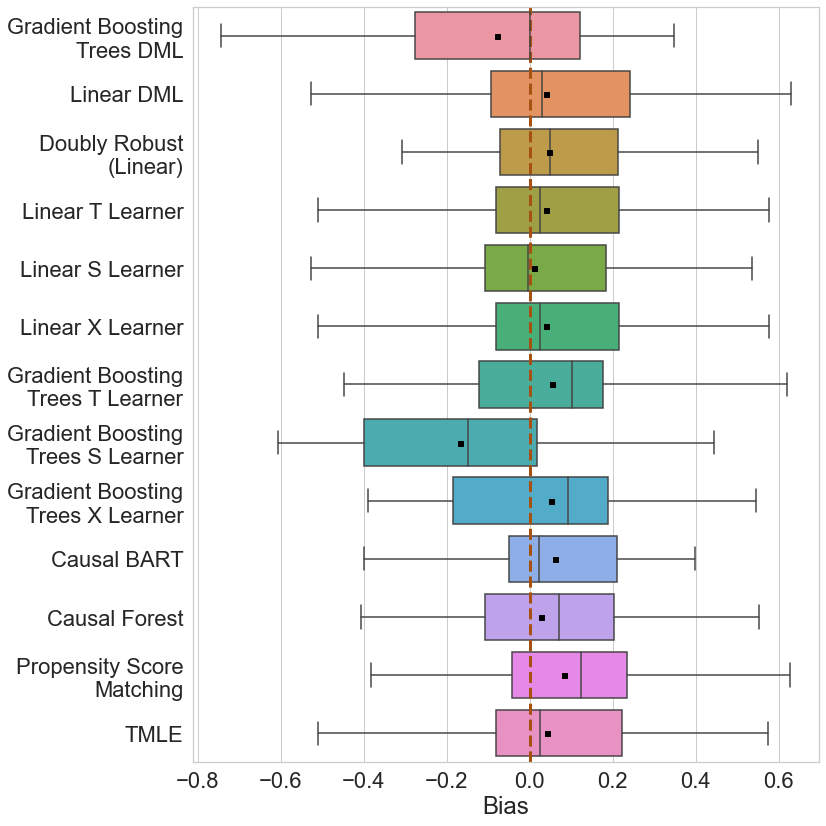

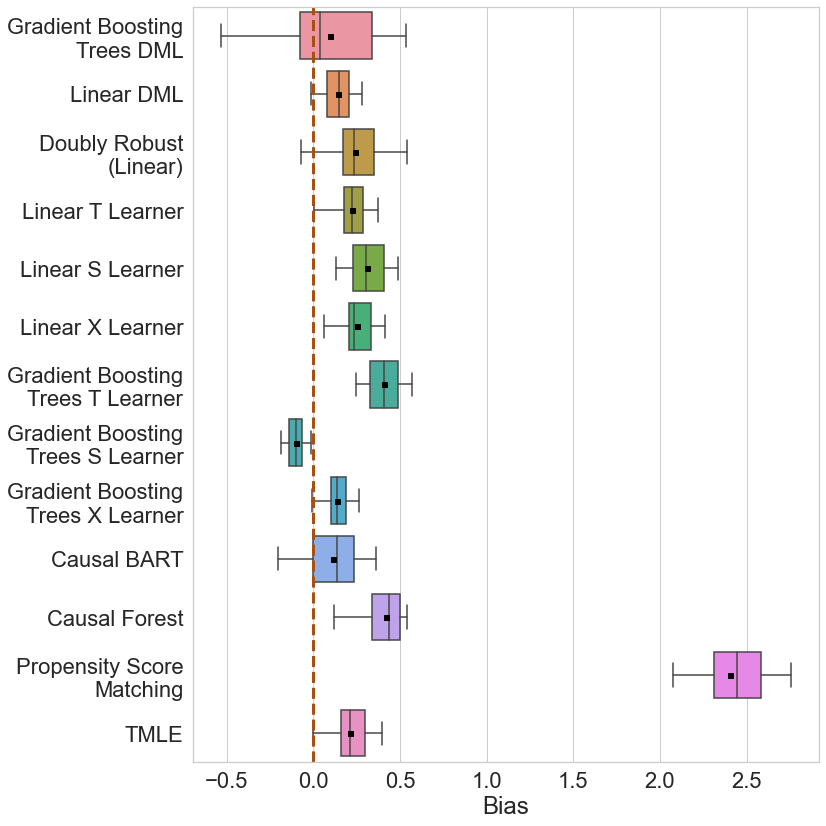

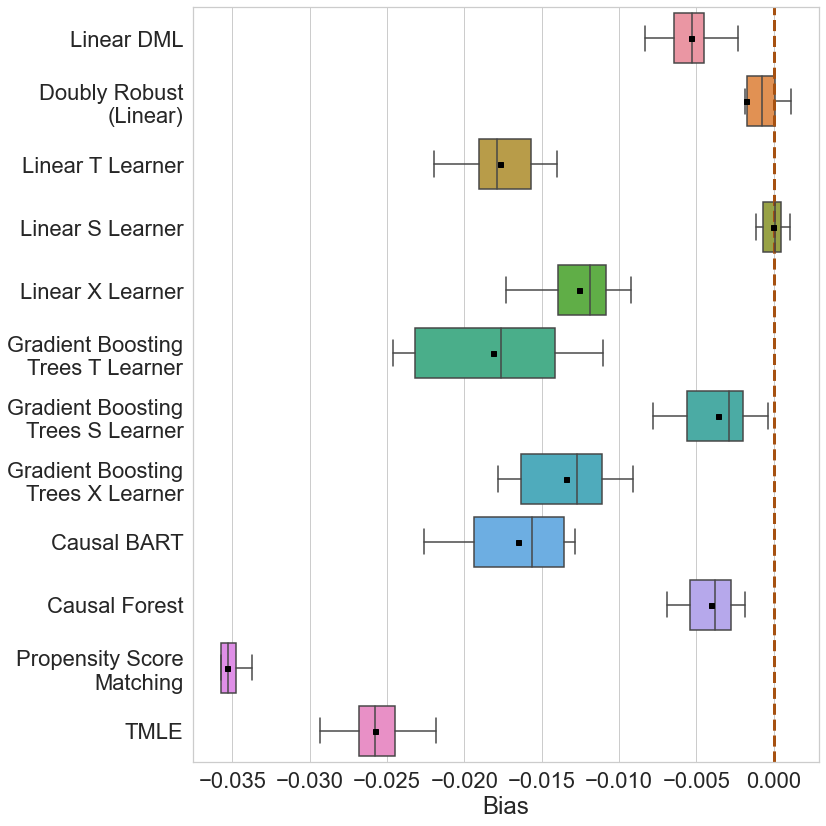

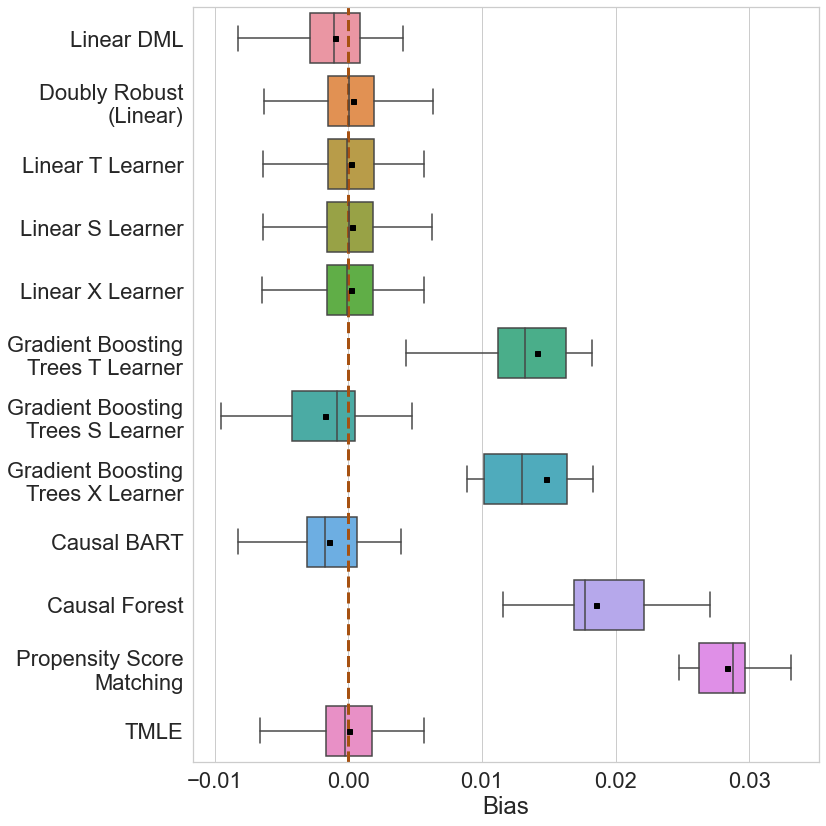

In [45]:
order = [ 'Gradient Boosting Trees DML', 'Linear DML', 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE']

width, height = 12, 12
sns.set(style="whitegrid",font_scale=2)
# order = list(np.abs(bias_1_gen.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_1_gen[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.tight_layout()
fig.savefig('Figures/dgp1_bias_credence.png')


# order = list(np.abs(bias_2_gen.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_2_gen[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.tight_layout()
plt.savefig('Figures/dgp2_bias_credence.png')

order = ['Linear DML', 'Doubly Robust (Linear)',
       'Linear T Learner', 'Linear S Learner', 'Linear X Learner',
       'Gradient Boosting Trees T Learner', 'Gradient Boosting Trees S Learner',
       'Gradient Boosting Trees X Learner', 'Causal BART', 'Causal Forest',
       'Propensity Score Matching', 'TMLE']

# order = list(np.abs(bias_lalonde_gen.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_lalonde_gen[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.tight_layout()
plt.savefig('Figures/lalonde_bias_credence.png')

# order = list(np.abs(bias_star_gen.mean(axis=0)).sort_values().index)
fig, ax = plt.subplots(figsize=(width, height))
sns.boxplot(data=bias_star_gen[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"},showfliers=False,ax=ax)
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 18) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.tight_layout()
plt.savefig('Figures/star_bias_credence.png')

# pd.concat([bias_1_gen.mean(axis=0),bias_1_gen.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp1_bias_credence.tex')
# pd.concat([bias_2_gen.mean(axis=0),bias_2_gen.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp2_bias_credence.tex')
# pd.concat([bias_lalonde_gen.mean(axis=0),bias_lalonde_gen.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/lalonde_bias_credence.tex')
pd.concat([bias_star_gen.mean(axis=0),bias_star_gen.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/star_bias_credence.tex')

# pd.concat([ate_1.mean(axis=0),ate_1.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp1_ate_true.tex')
# pd.concat([ate_2.mean(axis=0),ate_2.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp2_ate_true.tex')
# pd.concat([ate_lalonde.mean(axis=0),ate_lalonde.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/lalonde_ate_wrt_exp.tex')
# pd.concat([ate_star.mean(axis=0),ate_star.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/star_ate_wrt_exp.tex')

In [200]:
nsw_est = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_exp_lalonde,repeats=10)
nsw_est.mean()

NonParametric DML             370.939545
Linear DML                    851.846545
Doubly Robust (Linear)        835.117648
Linear T Learner              804.006886
Linear S Learner              778.490638
Linear X Learner              801.472429
NonParametric T Learner       722.673335
NonParametric S Learner       570.676913
NonParametric X Learner       739.754995
Causal BART                   818.787969
Causal Forest                 754.734444
Propensity Score Matching    1079.128961
TMLE                          798.271079
dtype: float64

In [208]:
print(pd.DataFrame([nsw_est.mean(),nsw_est.std()/np.sqrt(10)]).T.round(decimals=2).to_latex())

\begin{tabular}{lrr}
\toprule
{} &        0 &       1 \\
\midrule
NonParametric DML         &   370.94 &  394.68 \\
Linear DML                &   851.85 &  187.98 \\
Doubly Robust (Linear)    &   835.12 &  200.04 \\
Linear T Learner          &   804.01 &  195.83 \\
Linear S Learner          &   778.49 &  194.15 \\
Linear X Learner          &   801.47 &  197.24 \\
NonParametric T Learner   &   722.67 &  132.60 \\
NonParametric S Learner   &   570.68 &  104.93 \\
NonParametric X Learner   &   739.75 &  125.84 \\
Causal BART               &   818.79 &  184.46 \\
Causal Forest             &   754.73 &  153.83 \\
Propensity Score Matching &  1079.13 &  158.59 \\
TMLE                      &   798.27 &  197.49 \\
\bottomrule
\end{tabular}

